In [ ]:
def posneg(x):
    if x>0: return 1
    if x<0: return -1
    else: return 0

ump_df=ump_df.dropna(subset='favor_home')
blowngames = 0
blown_rows = []

for i in range(len(ump_df)):
    row = ump_df.iloc[i]

    margin = row['home_team_runs'] - row['away_team_runs']
    home_adj = row['home_team_runs'] - row['favor_home']
    adj_diff = home_adj - row['away_team_runs']

    if posneg(margin) != posneg(adj_diff):
        blowngames += 1
        blown_rows.append(row)

blowngames
blown_df=pd.DataFrame(blown_rows)
blown_df

blown_df['umpire'].value_counts().head(25)

NameError: name 'ump_df' is not defined

In [ ]:
import pandas as pd
from plotnine import*
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

ump_df= pd.read_csv('/Users/tommygillan/Downloads/mlb-umpire-scorecard.csv')
ump_df.shape

(18213, 19)

In [ ]:
cols = ump_df.columns[6:20]
ump_df[cols] = ump_df[cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
accuracy=ump_df.groupby('umpire')['accuracy'].aggregate(['mean', 'std']).sort_values(by='mean',ascending=False)
accuracy.head(20)
consistency=ump_df.groupby('umpire')['consistency'].aggregate(['mean', 'std']).sort_values(by='mean',ascending=False)
consistency.head(20)
total_impact=ump_df.groupby('umpire')['total_run_impact'].mean().sort_values(ascending=False)
total_impact

umpire
Marcus Pattillo    2.382000
Dale Scott         2.113929
Tim Welke          2.075357
John Hirschbeck    2.046909
Bob Davidson       1.991186
                     ...   
Alex MacKay        1.140000
Jeremie Rehak      1.135772
Alex Tosi          1.127674
David Arrieta      1.082000
John Libka         1.079917
Name: total_run_impact, Length: 124, dtype: float64

In [ ]:
ump_df['date'] = pd.to_datetime(ump_df['date'],errors='coerce')
ump_df['playoff_game'] = ump_df['date'].dt.month.isin([10, 11])
playoff_counts = ump_df.groupby('umpire')['playoff_game'].sum().sort_values(ascending=False)
playoff_counts.head(15)

umpire
Ted Barrett        14
Lance Barksdale    12
Chris Guccione     12
James Hoye         11
Jeff Nelson        11
Jim Wolf           11
Dan Iassogna       11
Mark Carlson       11
Alan Porter        11
Alfonso Marquez    11
Bill Miller        10
Dan Bellino        10
Laz Diaz           10
Angel Hernandez     9
Marvin Hudson       9
Name: playoff_game, dtype: int64

In [ ]:
merge1=pd.merge(accuracy, consistency, on='umpire',how='left')
merge1 = merge1.rename(columns={
    'mean_x': 'accuracy_mean',
    'std_x': 'accuracy_std',
    'mean_y': 'consistency_mean',
    'std_y': 'consistency_std',
    })
merge2= pd.merge(merge1, playoff_counts, on='umpire', how='left')
merge2

top10 = merge2.sort_values('accuracy_mean', ascending=False).head(10)
top10

,accuracy_mean,accuracy_std,consistency_mean,consistency_std,playoff_game
umpire,,,,,
John Libka,94.956667,1.865239,93.857500,2.139530,1
Brock Ballou,94.900000,1.307670,95.200000,1.324135,0
Edwin Moscoso,94.639759,1.830763,93.819277,1.883203,1
Jeremie Rehak,94.630894,2.235303,93.642276,2.238083,3
Jansen Visconti,94.567669,2.074322,93.996992,2.085191,3
Alex Tosi,94.500000,2.176935,93.634884,2.120521,1
Adam Beck,94.406452,2.052657,94.104839,2.086131,2
Jeremy Riggs,94.308197,2.027749,93.642623,1.978169,0
Junior Valentine,94.266667,1.823122,93.792593,2.086059,0


In [ ]:
dropped_ump=ump_df.dropna()

x=dropped_ump.drop(['total_run_impact','umpire','home','away','id','date', 'playoff_game'] ,axis=1)
y=dropped_ump['total_run_impact']
x['accuracy_above'] = dropped_ump['correct_calls_above_expected'] * dropped_ump['accuracy_above_expected']
x['pitchs_correct'] = dropped_ump['pitches_called'] * dropped_ump['correct_calls']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_sm = sm.add_constant(x)  
model = sm.OLS(y, X_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       total_run_impact   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     3106.
Date:                Fri, 12 Dec 2025   Prob (F-statistic):               0.00
Time:                        18:04:05   Log-Likelihood:                -10904.
No. Observations:               18093   AIC:                         2.183e+04
Df Residuals:                   18080   BIC:                         2.194e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
def posneg(x):
    if x>0: return 1
    if x<0: return -1
    else: return 0

ump_df=ump_df.dropna(subset='favor_home')
blowngames = 0
blown_rows = []

for i in range(len(ump_df)):
    row = ump_df.iloc[i]

    margin = row['home_team_runs'] - row['away_team_runs']
    home_adj = row['home_team_runs'] - row['favor_home']
    adj_diff = home_adj - row['away_team_runs']

    if posneg(margin) != posneg(adj_diff):
        blowngames += 1
        blown_rows.append(row)

blowngames
blown_df=pd.DataFrame(blown_rows)
blown_df

blown_df['umpire'].value_counts().head(25)

umpire
Lance Barrett         8
Doug Eddings          8
Joe West              7
Vic Carapazza         6
Phil Cuzzi            5
Chris Guccione        5
Rob Drake             5
Ben May               5
Jerry Layne           5
Hunter Wendelstedt    5
Dana DeMuth           5
Adam Hamari           5
Tripp Gibson          5
Pat Hoberg            5
Ramon De Jesus        5
Mike Estabrook        5
Dan Iassogna          5
Jordan Baker          5
Brian Gorman          4
Fieldin Culbreth      4
John Tumpane          4
Quinn Wolcott         4
Tim Timmons           4
Jim Reynolds          4
Stu Scheurwater       4
Name: count, dtype: int64

In [ ]:
blown_df['pitches_called'].mean()
ump_df['pitches_called'].mean()
blownavg= blown_df.aggregate('mean', numeric_only=True)
blownavg

id                              10541.496622
home_team_runs                      4.591216
away_team_runs                      4.368243
pitches_called                    170.739865
incorrect_calls                    15.172297
expected_incorrect_calls           14.092230
correct_calls                     155.567568
expected_correct_calls            156.647635
correct_calls_above_expected       -1.080068
accuracy                           91.064189
expected_accuracy                  91.722297
accuracy_above_expected            -0.654392
consistency                        92.288514
favor_home                          0.325811
total_run_impact                    2.467973
playoff_game                        0.030405
dtype: float64

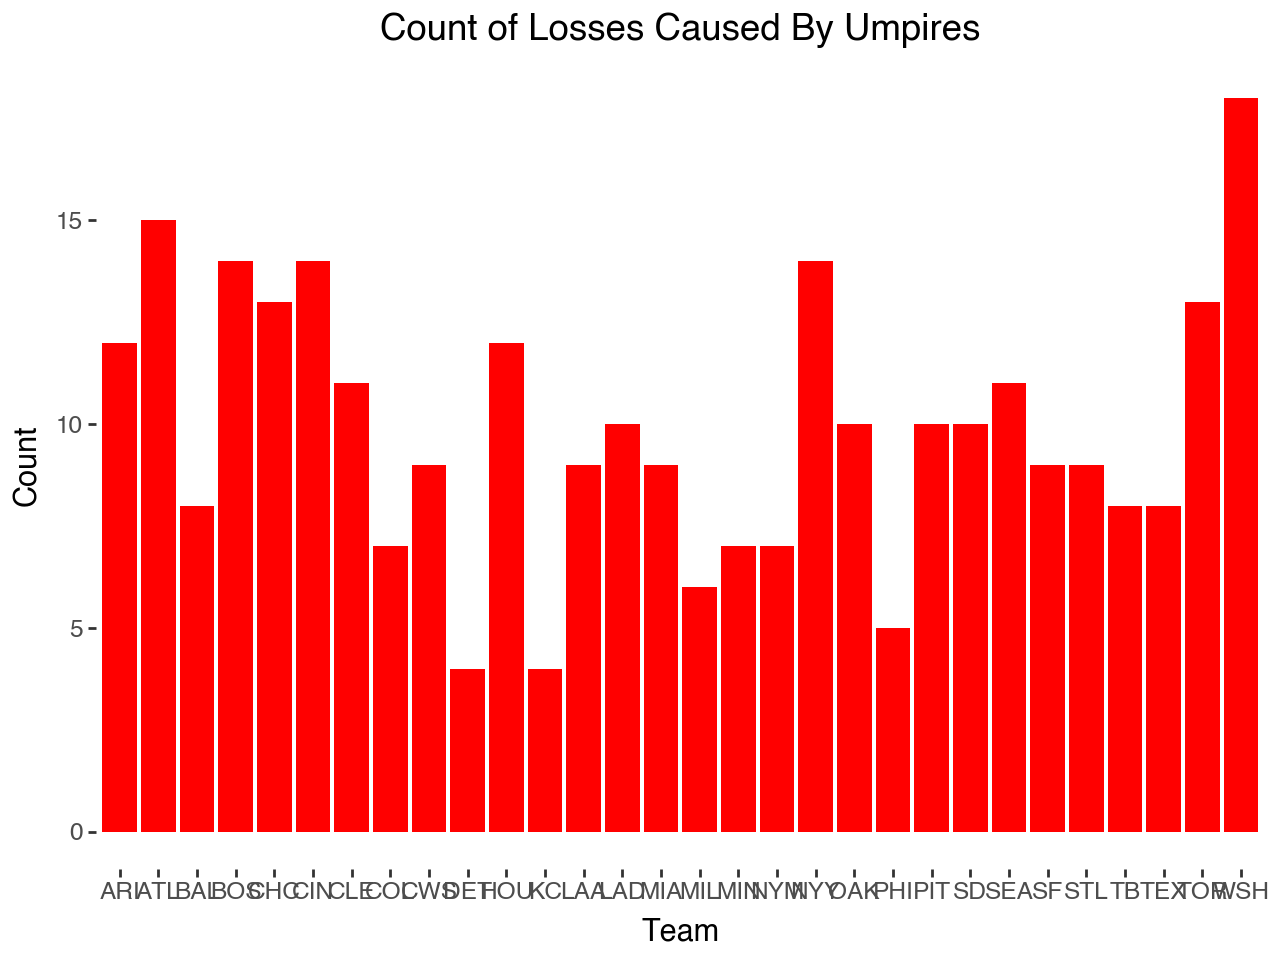

In [ ]:
blown_df
blown_df.loc[blown_df['home'] > blown_df['away'], 'team_cheated'] = blown_df['home']
blown_df.loc[blown_df['home'] <= blown_df['away'], 'team_cheated'] = blown_df['home']
blown_df['team_cheated'].value_counts()

plot=(ggplot(blown_df, aes(x='team_cheated'))
 + geom_bar(fill='red')  +theme(
     panel_grid_major=element_blank(),
     panel_grid_minor=element_blank(),
     panel_border=element_blank(),
     panel_background=element_blank()
 )
 + labs(title='Count of Losses Caused By Umpires', x='Team', y='Count')
)

plot.show()

In [ ]:
blown_df
blown_df.loc[blown_df['home'] > blown_df['away'], 'team_cheated'] = blown_df['home']
blown_df.loc[blown_df['home'] <= blown_df['away'], 'team_cheated'] = blown_df['home']
blown_df['team_cheated'].value_counts()

plot=(ggplot(blown_df, aes(x='team_cheated'))
 + geom_bar(fill='red')  +theme(
    axis.text.y = element_text(angle = 90, hjust = 1))
     panel_grid_major=element_blank(),
     panel_grid_minor=element_blank(),
     panel_border=element_blank(),
     panel_background=element_blank()
 )
 + labs(title='Count of Losses Caused By Umpires', x='Team', y='Count')
)

plot.show()

SyntaxError: unmatched ')' (<ipython-input-17-b34ea4b4ae27>, line 15)

In [ ]:
blown_df
blown_df.loc[blown_df['home'] > blown_df['away'], 'team_cheated'] = blown_df['home']
blown_df.loc[blown_df['home'] <= blown_df['away'], 'team_cheated'] = blown_df['home']
blown_df['team_cheated'].value_counts()

plot=(ggplot(blown_df, aes(x='team_cheated'))
 + geom_bar(fill='red')  +theme(
    axis.text.y = element_text(angle = 90, hjust = 1),
     panel_grid_major=element_blank(),
     panel_grid_minor=element_blank(),
     panel_border=element_blank(),
     panel_background=element_blank()
 )
 + labs(title='Count of Losses Caused By Umpires', x='Team', y='Count')
)

plot.show()

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-18-24477ce0fc04>, line 8)

In [ ]:
blown_df
blown_df.loc[blown_df['home'] > blown_df['away'], 'team_cheated'] = blown_df['home']
blown_df.loc[blown_df['home'] <= blown_df['away'], 'team_cheated'] = blown_df['home']
blown_df['team_cheated'].value_counts()

plot=(ggplot(blown_df, aes(x='team_cheated'))
 + geom_bar(fill='red')  
 +theme(
    axis.text.y = element_text(angle = 90, hjust = 1),
     panel_grid_major=element_blank(),
     panel_grid_minor=element_blank(),
     panel_border=element_blank(),
     panel_background=element_blank()
 )
 + labs(title='Count of Losses Caused By Umpires', x='Team', y='Count')
)

plot.show()

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-19-4e0b23a047f6>, line 9)

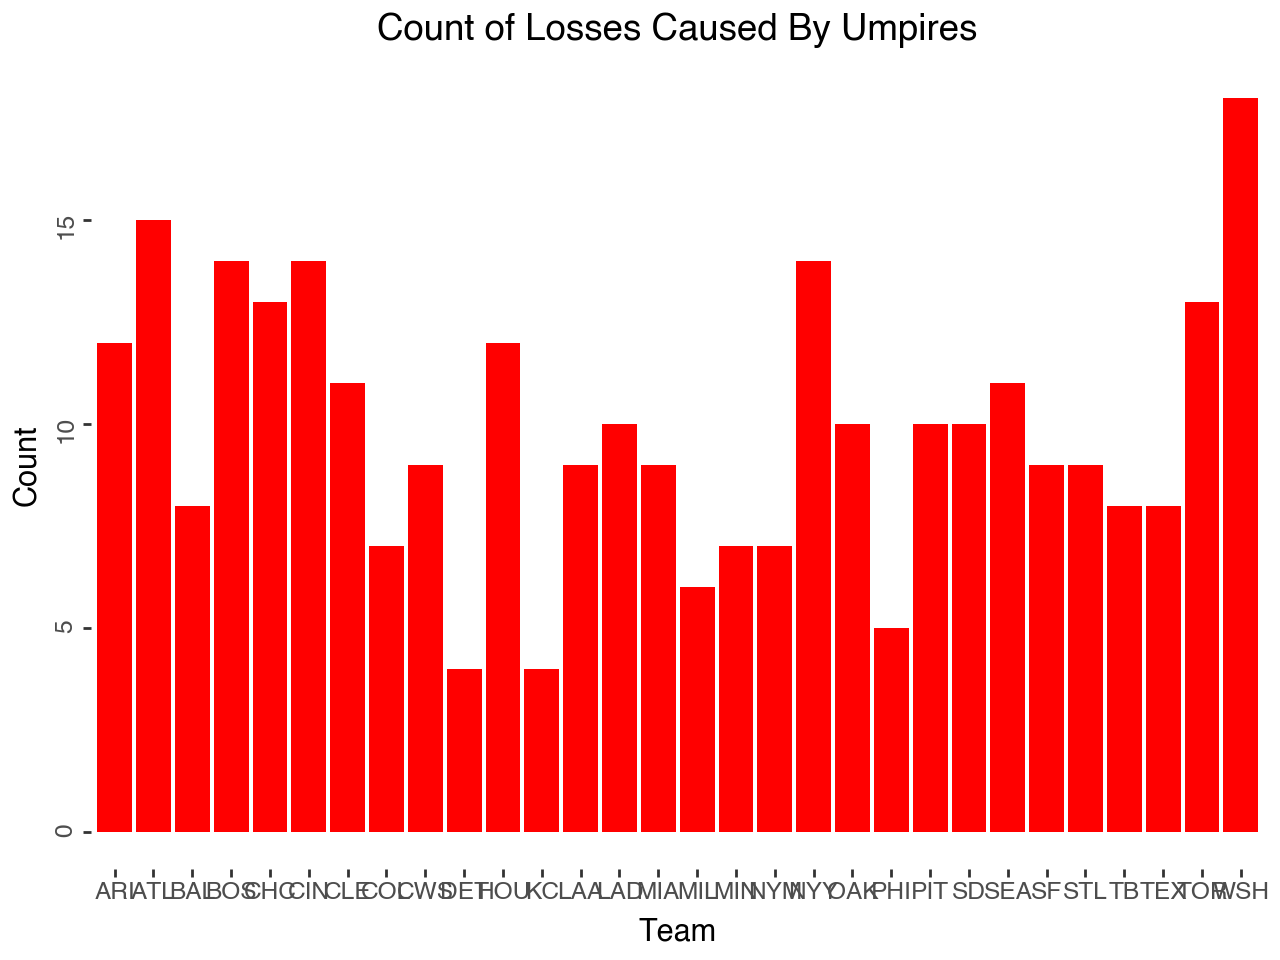

In [ ]:
blown_df
blown_df.loc[blown_df['home'] > blown_df['away'], 'team_cheated'] = blown_df['home']
blown_df.loc[blown_df['home'] <= blown_df['away'], 'team_cheated'] = blown_df['home']
blown_df['team_cheated'].value_counts()

plot=(ggplot(blown_df, aes(x='team_cheated'))
 + geom_bar(fill='red')  
 +theme(
    axis_text_y = element_text(angle = 90, hjust = 1),
     panel_grid_major=element_blank(),
     panel_grid_minor=element_blank(),
     panel_border=element_blank(),
     panel_background=element_blank()
 )
 + labs(title='Count of Losses Caused By Umpires', x='Team', y='Count')
)

plot.show()

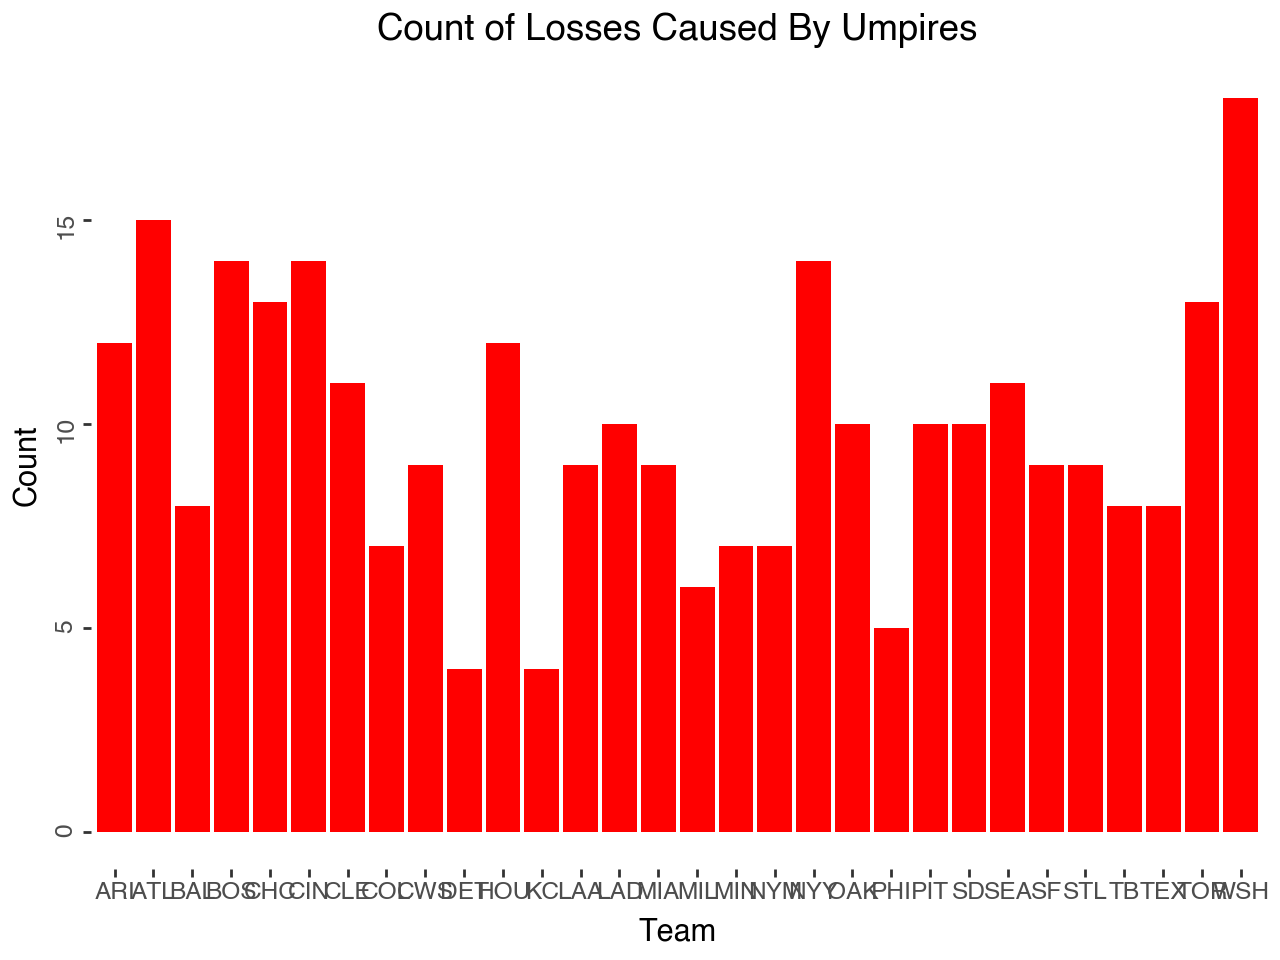

In [ ]:
blown_df
blown_df.loc[blown_df['home'] > blown_df['away'], 'team_cheated'] = blown_df['home']
blown_df.loc[blown_df['home'] <= blown_df['away'], 'team_cheated'] = blown_df['home']
blown_df['team_cheated'].value_counts()

plot=(ggplot(blown_df, aes(x='team_cheated'))
 + geom_bar(fill='red')  
 +theme(
    axis_text_y = element_text(angle = 90, hjust = 1),
     panel_grid_major=element_blank(),
     panel_grid_minor=element_blank(),
     panel_border=element_blank(),
     panel_background=element_blank()
 )
 + labs(title='Count of Losses Caused By Umpires', x='Team', y='Count')
)

plot.show()

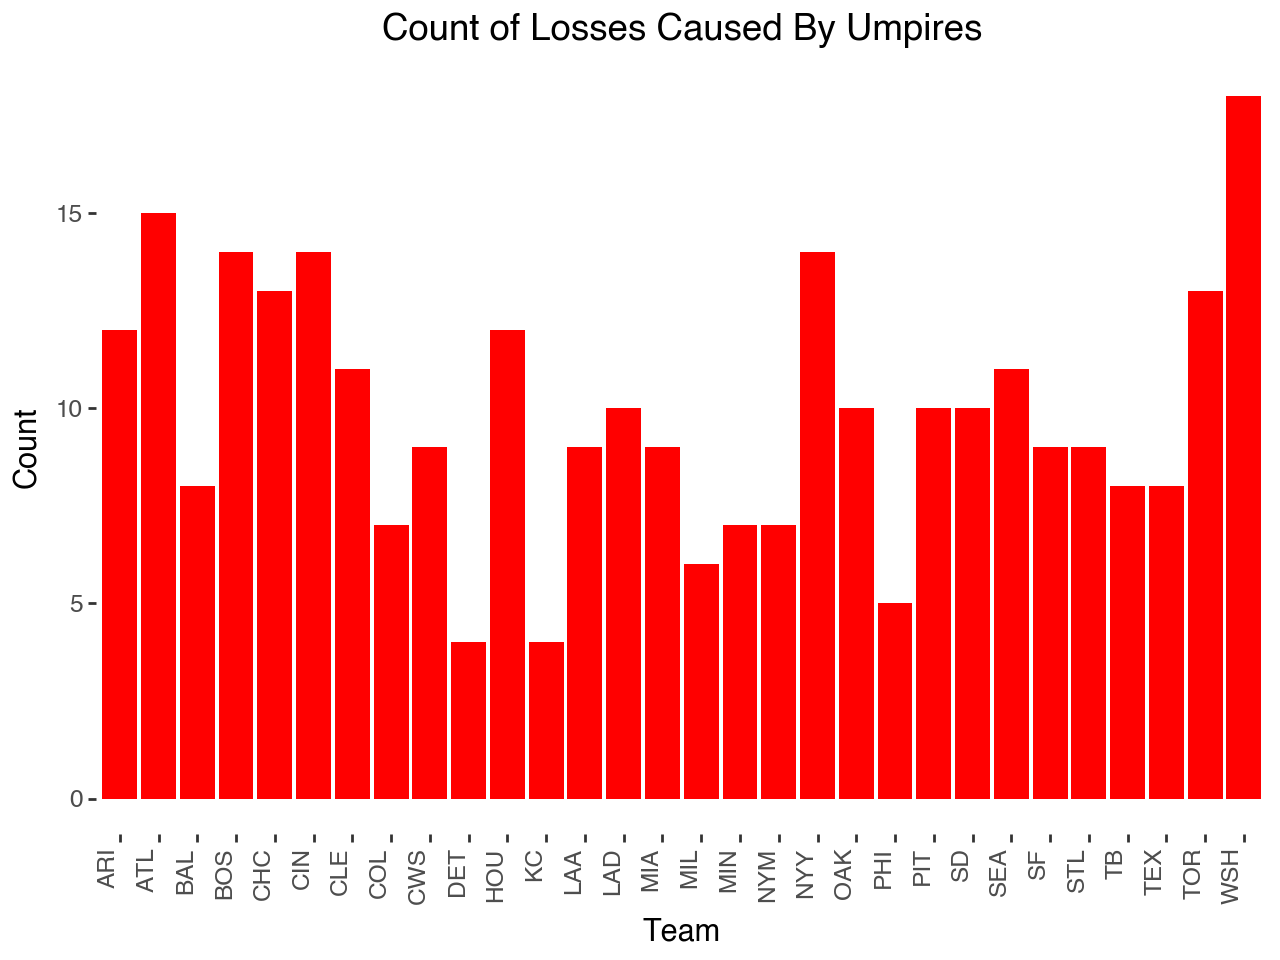

In [ ]:
blown_df
blown_df.loc[blown_df['home'] > blown_df['away'], 'team_cheated'] = blown_df['home']
blown_df.loc[blown_df['home'] <= blown_df['away'], 'team_cheated'] = blown_df['home']
blown_df['team_cheated'].value_counts()

plot=(ggplot(blown_df, aes(x='team_cheated'))
 + geom_bar(fill='red')  
 +theme(
    axis_text_x = element_text(angle = 90, hjust = 1),
     panel_grid_major=element_blank(),
     panel_grid_minor=element_blank(),
     panel_border=element_blank(),
     panel_background=element_blank()
 )
 + labs(title='Count of Losses Caused By Umpires', x='Team', y='Count')
)

plot.show()

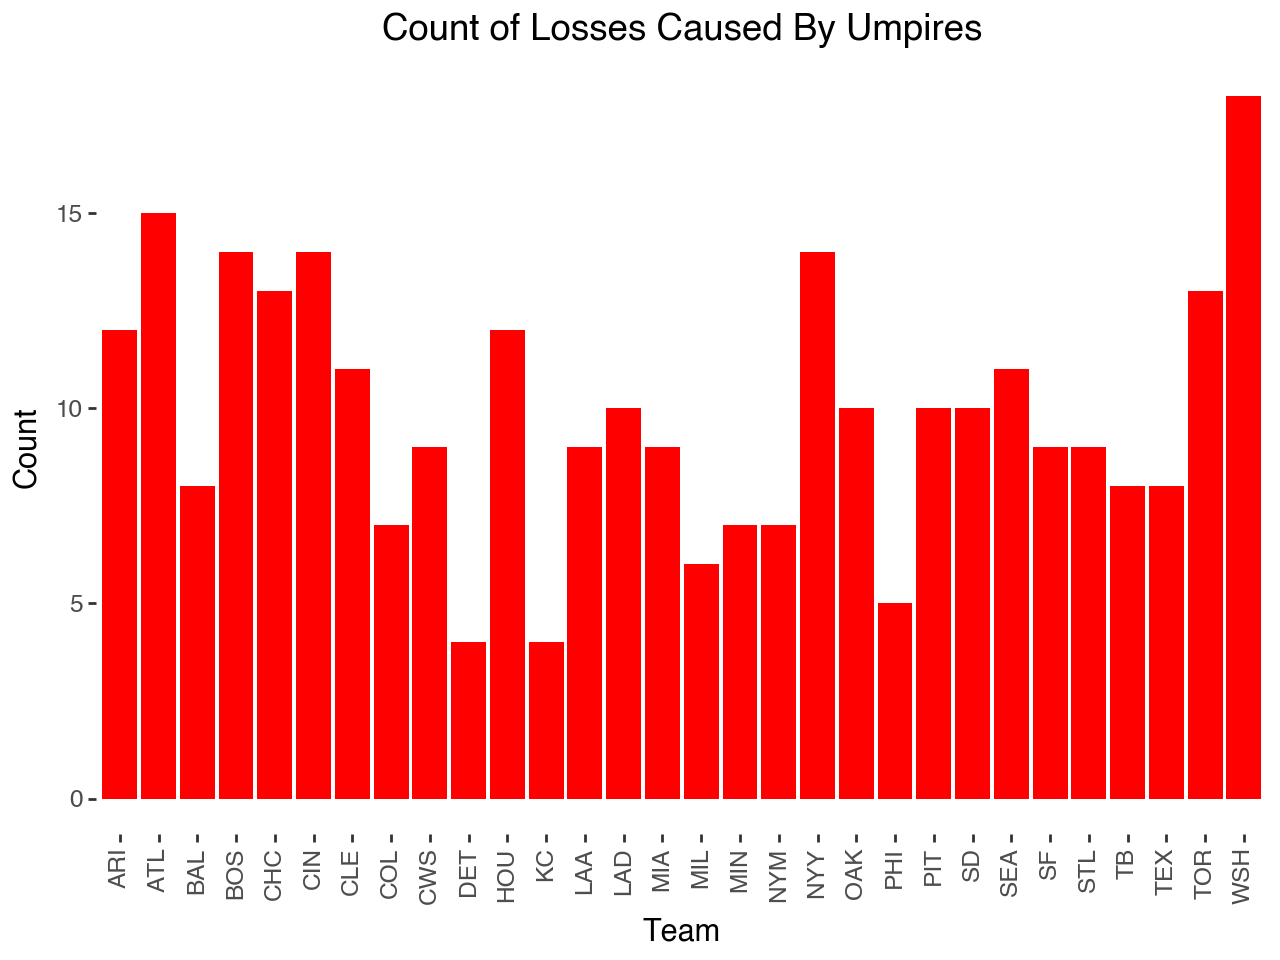

In [ ]:
blown_df
blown_df.loc[blown_df['home'] > blown_df['away'], 'team_cheated'] = blown_df['home']
blown_df.loc[blown_df['home'] <= blown_df['away'], 'team_cheated'] = blown_df['home']
blown_df['team_cheated'].value_counts()

plot=(ggplot(blown_df, aes(x='team_cheated'))
 + geom_bar(fill='red')  
 +theme(
    axis_text_x = element_text(angle = 90,),
     panel_grid_major=element_blank(),
     panel_grid_minor=element_blank(),
     panel_border=element_blank(),
     panel_background=element_blank()
 )
 + labs(title='Count of Losses Caused By Umpires', x='Team', y='Count')
)

plot.show()

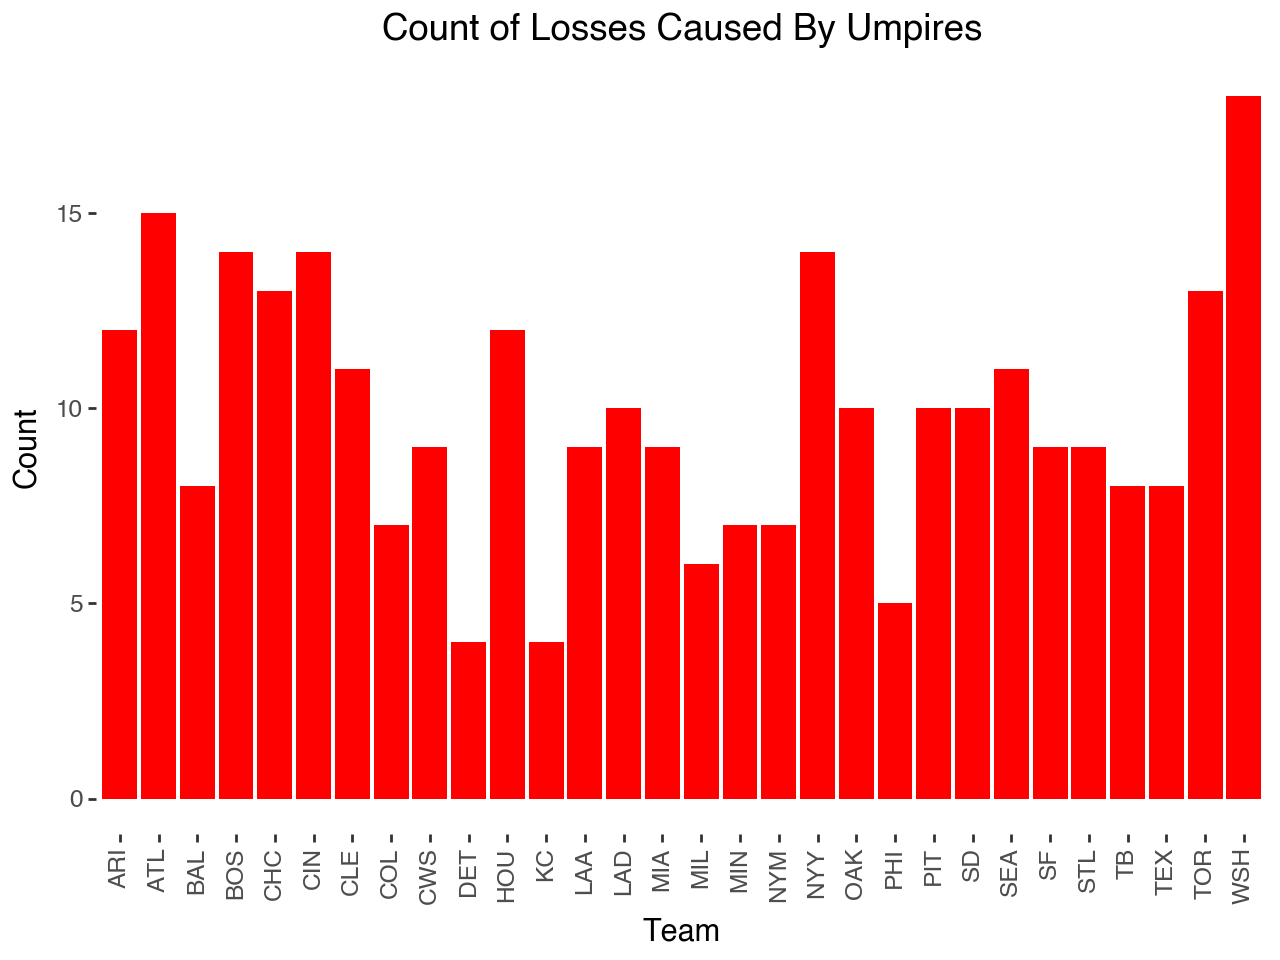

In [ ]:
blown_df
blown_df.loc[blown_df['home'] > blown_df['away'], 'team_cheated'] = blown_df['home']
blown_df.loc[blown_df['home'] <= blown_df['away'], 'team_cheated'] = blown_df['home']
blown_df['team_cheated'].value_counts()

plot=(ggplot(blown_df, aes(x='team_cheated'))
 + geom_bar(fill='red')  
 +theme(
    axis_text_x = element_text(angle = 90),
     panel_grid_major=element_blank(),
     panel_grid_minor=element_blank(),
     panel_border=element_blank(),
     panel_background=element_blank()
 )
 + labs(title='Count of Losses Caused By Umpires', x='Team', y='Count')
)

plot.show()

In [ ]:
perfect_accuracy= ump_df[ump_df['accuracy']==100]
perfect_accuracy

,id,date,umpire,home,away,home_team_runs,away_team_runs,pitches_called,incorrect_calls,expected_incorrect_calls,correct_calls,expected_correct_calls,correct_calls_above_expected,accuracy,expected_accuracy,accuracy_above_expected,consistency,favor_home,total_run_impact,playoff_game
4,5,2022-10-29,Pat Hoberg,HOU,PHI,5,2,129.0,0.0,8.7,129.0,120.3,8.7,100.0,93.2,6.8,96.1,0.0,0.0,True


In [ ]:
pat_h=ump_df[ump_df['umpire']=='Pat Hoberg']
pat_worst= pat_h.loc[pat_h['accuracy'].idxmin()]
pat_avg=pat_h.mean(numeric_only=True)
total_avg=ump_df.mean(numeric_only=True)
total_avg

compare = pd.concat([pat_avg, total_avg], axis=1, ignore_index=True)
compare=pd.concat([compare, blownavg], axis=1, ignore_index=True)
compare

compare.drop(['id','home_team_runs','away_team_runs','pitches_called','favor_home','incorrect_calls','expected_incorrect_calls',
'accuracy_above_expected','total_run_impact','playoff_game','expected_correct_calls'],axis=0, inplace=True)

compare

compare = compare.reset_index().melt(id_vars="index", 
                                     var_name="Hoiberg_vs_Avg_vs_Blown", 
                                     value_name="value")

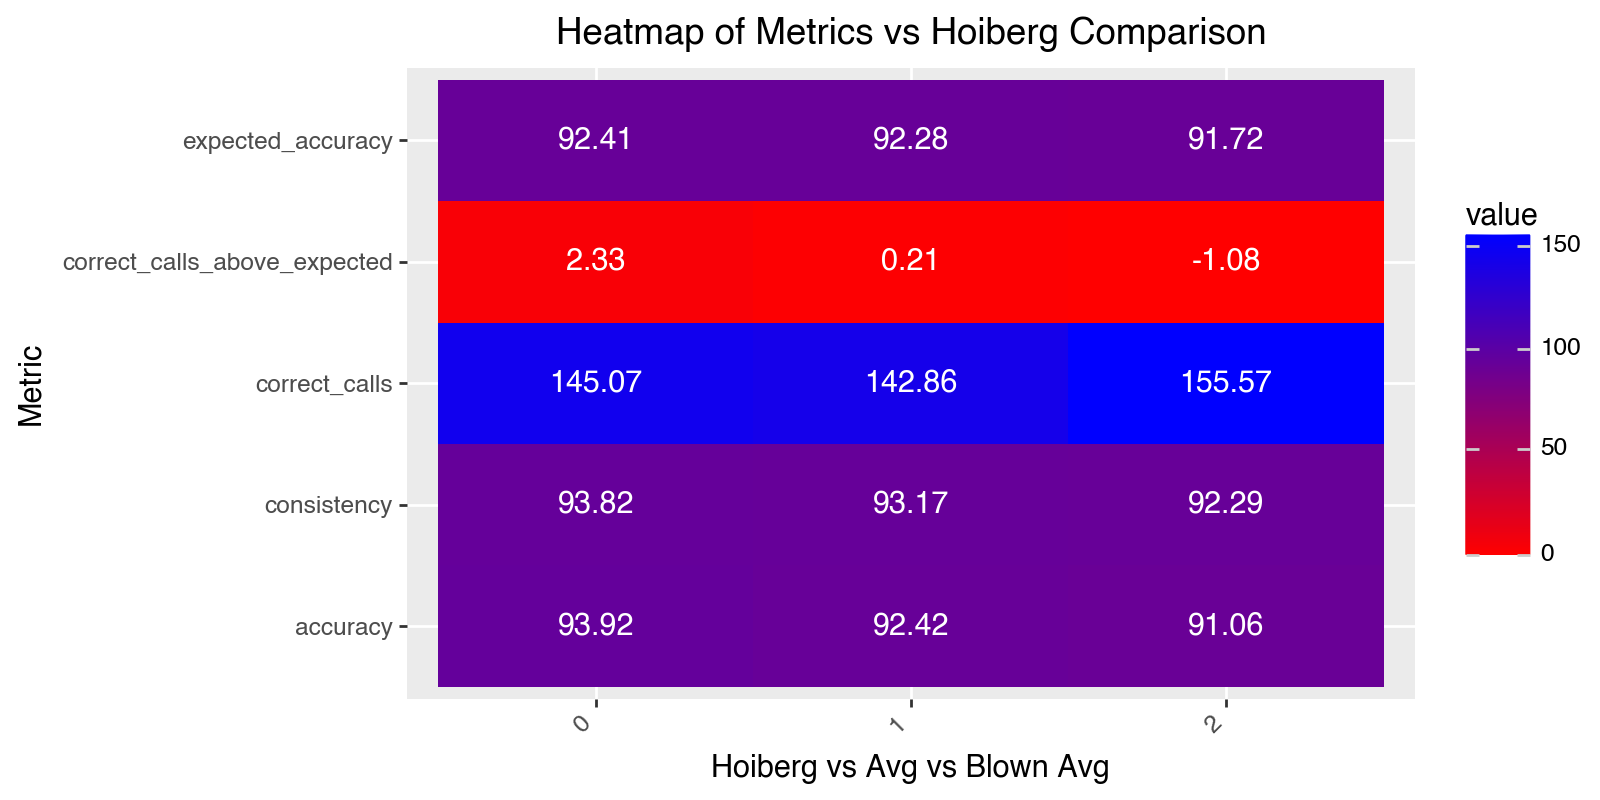

PlotnineError: "Could not evaluate the 'fill' mapping: 'Hoiberg vs Avg' (original error: invalid syntax (<string-expression>, line 1))"

In [ ]:
compare
compare
compare['value'] = pd.to_numeric(compare['value'], errors='coerce')
compare['value'] = compare['value'].round(2)

heat=( ggplot(compare, aes(x='Hoiberg_vs_Avg_vs_Blown', y='index', fill="value"))
    + geom_tile()
    + geom_text(aes(label='value'), color="white")
    + scale_fill_gradient(low="red", high="blue")
    + labs(
        title="Heatmap of Metrics vs Hoiberg Comparison",
        x="Hoiberg vs Avg vs Blown Avg",
        y="Metric"
    )
    + theme(
        figure_size=(8, 4),
        axis_text_x=element_text(rotation=45, hjust=1)
    )
)
heat.show()

scatter=(
ggplot(compare, aes(x='index', y='value', fill='Hoiberg vs Avg'))
+geom_boxplot(stat='identity',position='dodge')
+labs(title='x')
)
scatter.show()

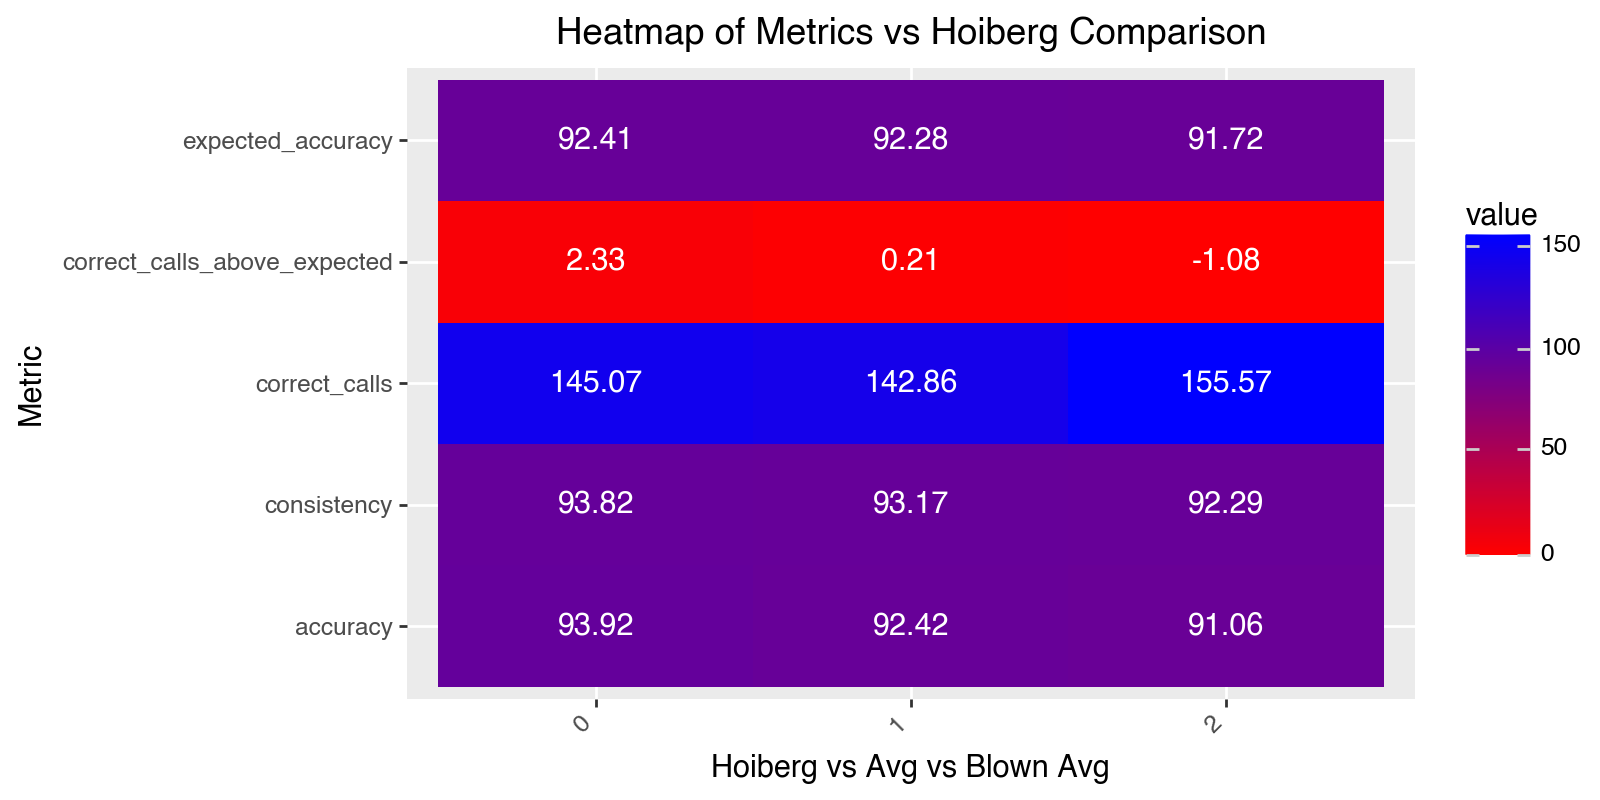

PlotnineError: "Could not evaluate the 'fill' mapping: 'Hoiberg vs Avg' (original error: invalid syntax (<string-expression>, line 1))"

In [ ]:
compare
compare
compare['value'] = pd.to_numeric(compare['value'], errors='coerce')
compare['value'] = compare['value'].round(2)

heat=( ggplot(compare, aes(x='Hoiberg_vs_Avg_vs_Blown', y='index', fill="value"))
    + geom_tile()
    + geom_text(aes(label='value'), color="white")
    + scale_fill_gradient(low="red", high="blue")
    + labs(
        title="Heatmap of Metrics vs Hoiberg Comparison",
        x="Hoiberg vs Avg vs Blown Avg",
        y="Metric"
    )
    + theme(
        figure_size=(8, 4),
        axis_text_x=element_text(rotation=45, hjust=1)
    )
)
heat.show()

scatter=(
ggplot(compare, aes(x='index', y='value', fill='Hoiberg vs Avg'))
+geom_boxplot(stat='identity',position='dodge')
+labs(title='x')
)
scatter.show()

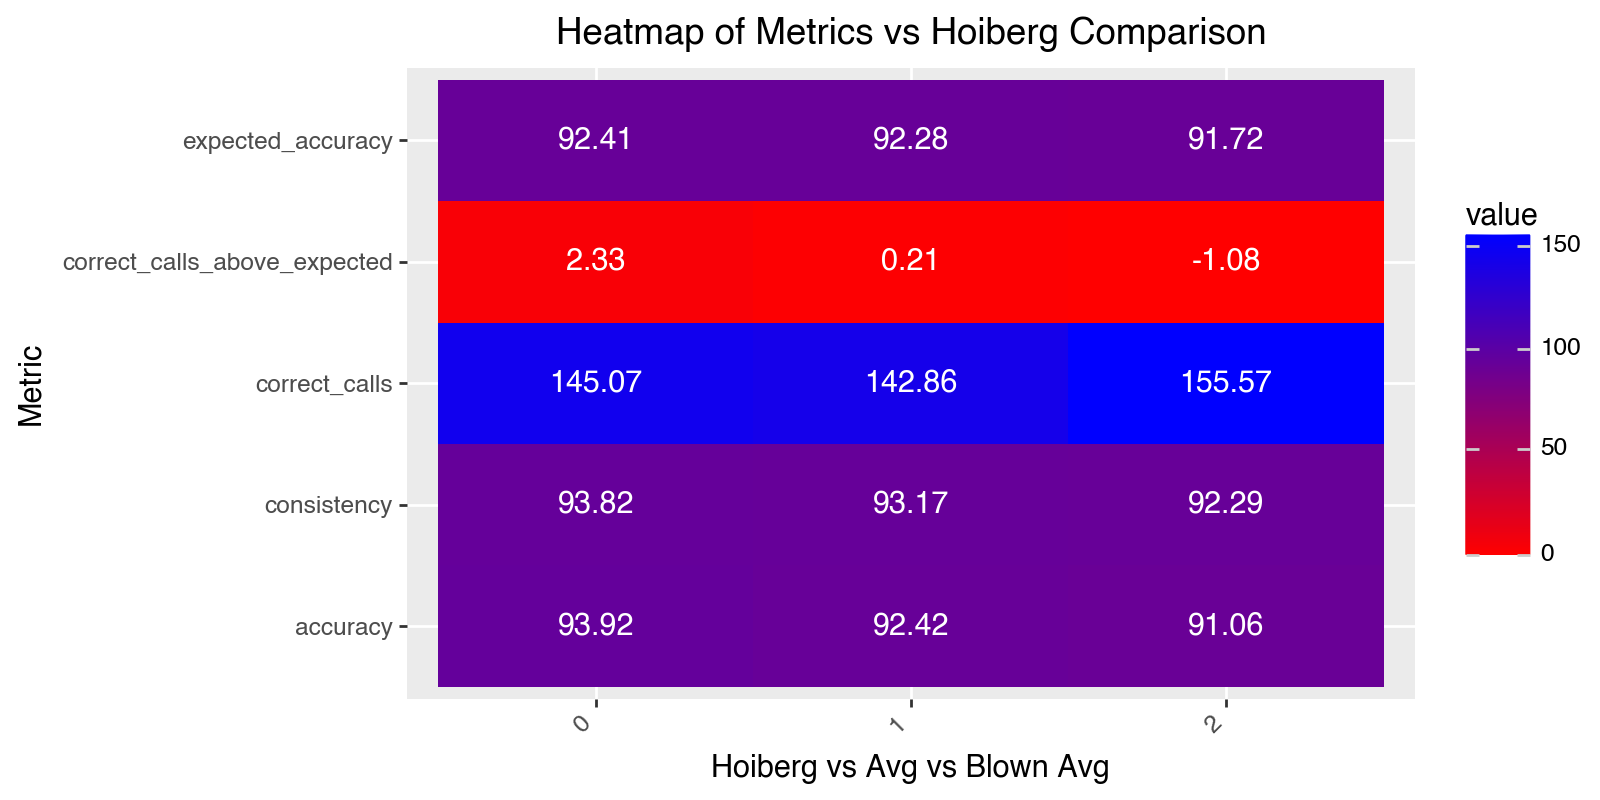

In [ ]:
compare
compare
compare['value'] = pd.to_numeric(compare['value'], errors='coerce')
compare['value'] = compare['value'].round(2)

heat=( ggplot(compare, aes(x='Hoiberg_vs_Avg_vs_Blown', y='index', fill="value"))
    + geom_tile()
    + geom_text(aes(label='value'), color="white")
    + scale_fill_gradient(low="red", high="blue")
    + labs(
        title="Heatmap of Metrics vs Hoiberg Comparison",
        x="Hoiberg vs Avg vs Blown Avg",
        y="Metric"
    )
    + theme(
        figure_size=(8, 4),
        axis_text_x=element_text(rotation=45, hjust=1)
    )
)
heat.show()